# Анализ продаж магазина электроники за 12 месяцев

Представлен анализ продаж магазина электроники в США. 
Исходные данные состоят из 12 CSV-файлов, каждый из которых соответствует месяцу. 
Виды исходных данных: номер заказа (Order ID), наименование товара (Product), количество товара в заказе (Quantity Ordered), цена за единицу товара (Price Each), дата заказа (Order Date), адрес покупателя (Purchase Address).
### Главные вопосы, ответы на которые представлены в отчёте:
1. В каком месяце было продано больше всего товаров?
2. В каком городе наиболее высокие продажи?
3. В каком месяце является самым прибыльным?
4. В какое время наибольшее количество заказов?
5. Какие товары продаются лучше всех, а также от чего зависят их продажи?
6. Какие товары чаще всего покупают вместе?

## 1. Совмещаем данные о продажах за 12 месяцев в один CSV файл

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sales/Sales_April_2019.csv')

In [3]:
files = [file for file in os.listdir('./Sales')]
all_datasets = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales/'+file)
    all_datasets = pd.concat([all_datasets, df])
all_datasets.to_csv('all_data.csv', index=False)

#### Считываем новый CSV файл

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Добавляем столбец с месяцами

In [5]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2] 

## 3. Очищаем данные от некорректных значений

#### Удаляем значения NaN

In [7]:
all_data.dropna(inplace=True) 

#### Выявляем и удаляем некорректные значения в столбце Month

In [8]:
all_data['Month'].unique()
all_data['Month'].loc[(all_data['Month'] == 'Or')]
all_data.drop(all_data[all_data['Month'] == 'Or'].index, inplace=True)

#### Меняем тип столбца Month на int32

In [9]:
all_data['Month'] = all_data['Month'].astype('int32')

## 4. Определяем, в каком месяце были самые высокие продажи за год

#### Создаем столбец Total

In [10]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

In [11]:
all_data['Total'] = all_data['Price Each'] * all_data['Quantity Ordered']

#### Строим график продаж

In [12]:
monthly_sales = pd.DataFrame()
monthly_sales = all_data.groupby('Month').sum()
monthly_sales.to_csv('monthly_sales.csv')
monthly_sales = pd.read_csv('monthly_sales.csv')

In [13]:
monthly_sales.set_index('Month', inplace=True)

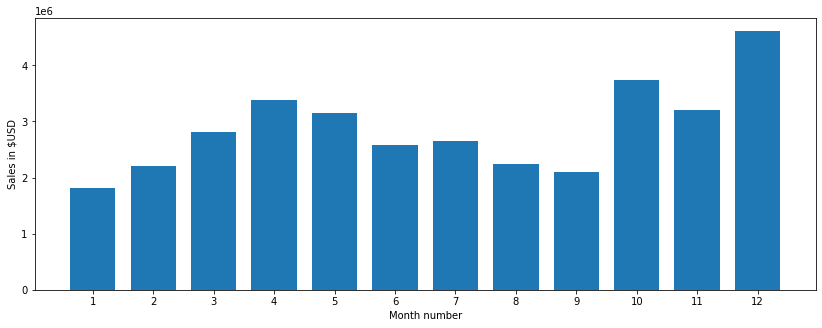

In [14]:
months = range(1, 13)
plt.figure(figsize=(14, 5))
plt.bar(months, monthly_sales['Total'], width=0.75)
plt.xticks(months)
plt.ylabel('Sales in $USD')
plt.xlabel('Month number')
plt.show()


## 5. Определим, в каком городе наиболее высокие продажи

#### Создаём колонку City

In [15]:
def get_city(address):                    #Функция для извлечения города
    return address.split(',')[1] 
def get_state(address):                   #Функция для извлечения штата
    return address.split(',')[2].split()[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x)) 

#### Создаём таблицу с продажами по городам

In [16]:
city_sales = pd.DataFrame()
city_sales = all_data.groupby('City').sum()
city_sales.to_csv('city_sales.csv')
city_sales = pd.read_csv('city_sales.csv')
city_sales

,City,Quantity Ordered,Price Each,Month,Total
0,Atlanta GA,16602,2779908.20,104794,2795498.58
1,Austin TX,11153,1809873.61,69829,1819581.75
2,Boston MA,22528,3637409.77,141112,3661642.01
3,Dallas TX,16730,2752627.82,104620,2767975.40
4,Los Angeles CA,33289,5421435.23,208325,5452570.80
5,New York City NY,27932,4635370.83,175741,4664317.43
6,Portland ME,2750,447189.25,17144,449758.27
7,Portland OR,11303,1860558.22,70621,1870732.34
8,San Francisco CA,50239,8211461.74,315520,8262203.91
9,Seattle WA,16553,2733296.01,104941,2747755.48


#### Создаём диаграмму с продажами по городам

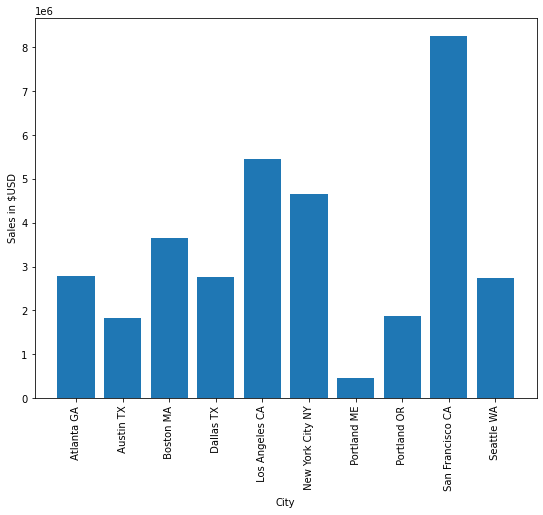

In [17]:
cities = all_data['City'].unique()
plt.figure(figsize=(9,7))
plt.bar(city_sales['City'], city_sales['Total'])
plt.xticks(city_sales['City'], rotation='vertical')
plt.ylabel('Sales in $USD')
plt.xlabel('City')
plt.show()


## 6. Определим, в какое время больше всего продаж

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [19]:
all_data['Hour'] = all_data['Order Date'].dt.hour

#### Согласно диаграмме, наибольшее количество покупок происходит в 12 и в 20 часов

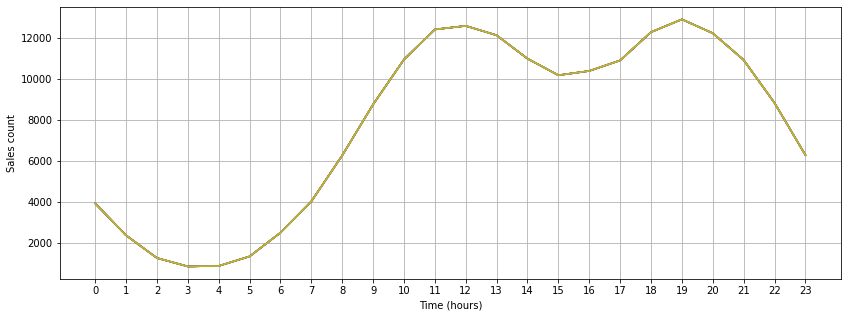

In [20]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(14, 5))
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Sales count')
plt.xlabel('Time (hours)')
plt.show()

## 7. Определим самые популярные товары, а также зависимость спроса от цены

#### Самый продаваемый товар: AAA Batteries (4-pack)

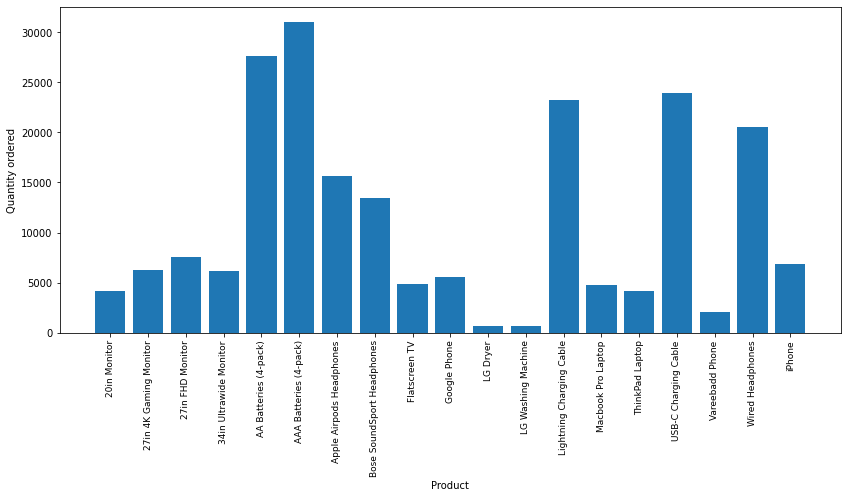

In [21]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.figure(figsize=(14, 6))
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=9)
plt.show()

#### Можно сделать вывод: количество продаж обратнопропорционально цене товара

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14212\3967812593.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


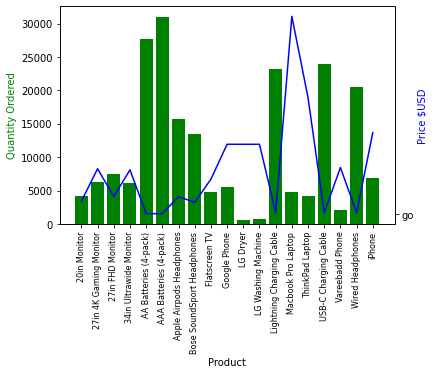

In [22]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'b-', 'go')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price $USD', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()



## 8. Определим, какие товары чаще всего покупают вместе

In [23]:
dup = all_data.groupby(['Hour', 'Product']).sum()


In [24]:
dup = all_data[all_data['Order ID'].duplicated(keep=False)]

In [25]:
dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14212\777043712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [33]:
dup = dup[['Order ID', 'Grouped']].drop_duplicates()

In [34]:
from itertools import combinations
from collections import Counter

combination_items = {'Combination':[], 'Number':[]}
count = Counter()
for row in dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    combination_items['Combination'].append(key)
    combination_items['Number'].append(value)

In [35]:
combination_items = pd.DataFrame(combination_items)
items_list = []
for item in combination_items['Combination']:
    items_list.append(item[0] + ' + ' + item[1])
combination_items.to_csv('combination_items.csv')      

#### Согласно диаграмме, самая популярная комбинация товаров: iPhone + Lightning Charging Cable

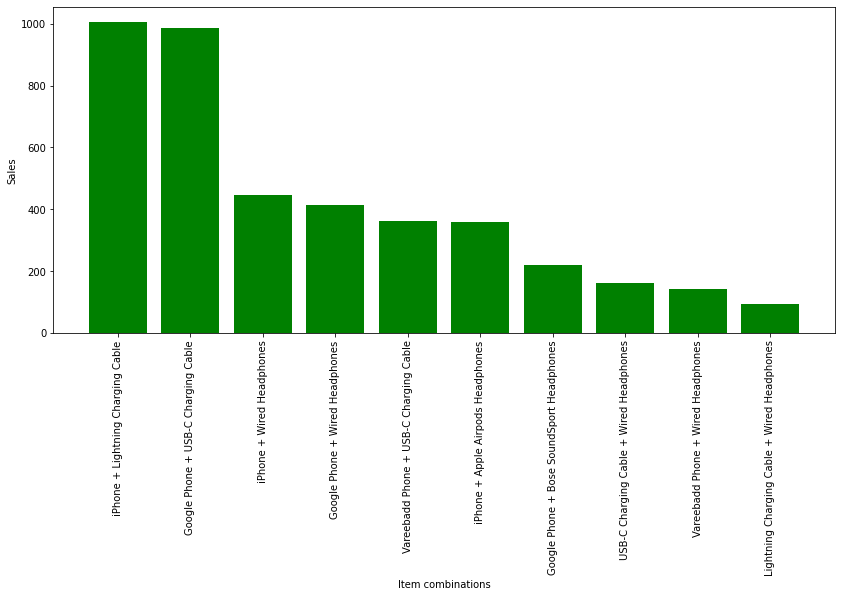

In [36]:
plt.figure(figsize=(14, 6))
plt.bar(items_list, combination_items['Number'], color='Green')
plt.xticks(items_list, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('Item combinations')
plt.show()

In [38]:
all_data.to_csv('new_all_data.csv')

In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Total             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 14.2+ MB


In [41]:
gg = all_data.groupby('Product').sum()

In [42]:
gg.sort_values('Total')

,Quantity Ordered,Price Each,Month,Total,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
Wired Headphones,20557,226395.18,133397,246478.43,271720
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
LG Dryer,646,387600.00,4383,387600.00,9326
LG Washing Machine,666,399600.00,4523,399600.00,9785
20in Monitor,4129,451068.99,29336,454148.71,58764
Vareebadd Phone,2068,826000.00,14309,827200.00,29472
